In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import os

In [2]:
metody = ['Euler', 'Verlet', 'RK4']
folder = 'results_1b'

In [3]:
def czytaj(file_path):
    with open(file_path, 'r') as file:
        data = []
        for line in file:
            values = list(map(float, line.split()))
            data.append(values)
        data = np.array(data)
        dt = data[0][0]
        data = data[1:,:]
        data = data.T
        return data, dt

In [4]:
def rysuj_xt(data, i, krokT) :
    t = data[i][0]
    x = data[i][1]
    plt.plot(t,x, label=krokT)

def rysuj_vt(data, i, krokT) :
    t = data[i][0]
    v = data[i][2]
    plt.plot(t,v, label=krokT)

def rysuj_vx(data, i, krokT) :
    x = data[i][1]
    v = data[i][2]
    plt.plot(x,v, label=krokT)

def rysuj_et(data, i, krokT) :
    t = data[i][0]
    e = data[i][3]
    plt.plot(t,e, label=krokT)

In [5]:
def ogarnij_czas(t, dt) :
    return np.arange(0,t/dt+1) * dt

In [6]:
data_Euler = [[],[],[],[],[], [],[]]
data_Verlet = [[],[],[],[],[], [],[]]
data_RK4 = [[],[],[],[],[], [],[]]

DeltaTE = np.zeros(7)
DeltaTV = np.zeros(7)
DeltaTR = np.zeros(7)


In [7]:
for metoda in metody:
    for i in range(7) :
        plik = f'{metoda}_{i}.txt'
        sciezka = os.path.join(folder, plik)
        if os.path.exists(sciezka):
            print(f"Otwieranie {plik}")
            if metoda=='Euler' :
                data_Euler[i], DeltaTE[i] = czytaj(sciezka)
            if metoda=='Verlet' :
                data_Verlet[i], DeltaTV[i] = czytaj(sciezka)
            if metoda=='RK4' :
                data_RK4[i], DeltaTR[i] = czytaj(sciezka)

        else:
            print(f"nie istnieje.")


Otwieranie Euler_0.txt
Otwieranie Euler_1.txt
Otwieranie Euler_2.txt
Otwieranie Euler_3.txt
Otwieranie Euler_4.txt
Otwieranie Euler_5.txt
Otwieranie Euler_6.txt
Otwieranie Verlet_0.txt
Otwieranie Verlet_1.txt
Otwieranie Verlet_2.txt
Otwieranie Verlet_3.txt
Otwieranie Verlet_4.txt
Otwieranie Verlet_5.txt
Otwieranie Verlet_6.txt
Otwieranie RK4_0.txt
Otwieranie RK4_1.txt
Otwieranie RK4_2.txt
Otwieranie RK4_3.txt
Otwieranie RK4_4.txt
Otwieranie RK4_5.txt
Otwieranie RK4_6.txt


In [8]:
for i in range(7) :
    data_Euler[i][0] = ogarnij_czas(10, DeltaTE[i])
for i in range(7) :
    data_Verlet[i][0] = ogarnij_czas(10, DeltaTV[i])
for i in range(7) :
    data_RK4[i][0] = ogarnij_czas(10, DeltaTR[i])

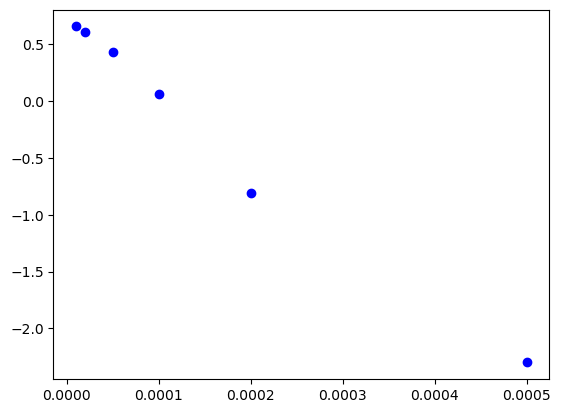

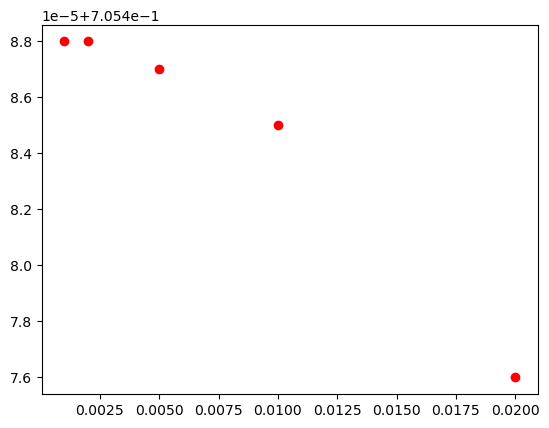

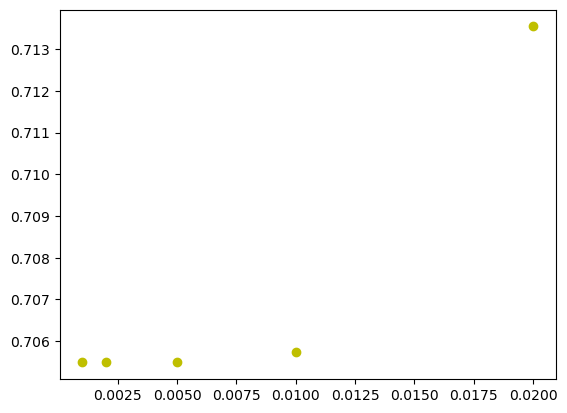

In [9]:
for i in range(1,7):
    # print(DeltaTV[i],)
    plt.plot(DeltaTE[i], data_Euler[i][1,data_Euler[i][0]==10.00], 'o', c='b')
plt.show()
for i in range(2,7):
    # print(DeltaTV[i],)
    plt.plot(DeltaTV[i], data_Verlet[i][1,data_Verlet[i][0]==10.00], 'o', c='r')
plt.show()
for i in range(2,7):
    # print(DeltaTV[i],)
    plt.plot(DeltaTR[i], data_RK4[i][1,data_RK4[i][0]==10.00], 'o', c='y')
plt.show()